# **T&T LAB ASSIGNMENT 13**  
**Name: Shidhu Bhadra  
Roll: 1905348  
Date: 30/03/2022**

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
df_main = pd.read_csv("Social_Network_Ads.csv")
df_main.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df = df_main.copy()
print(df.head())
print(df.shape)

   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
(400, 3)


In [4]:
df.isnull().mean().round(5).mul(100).sort_values(ascending=False)

Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

In [5]:
cols = ['Age', 'EstimatedSalary', 'Purchased']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [6]:
df.head()

,Age,EstimatedSalary,Purchased
0,1,4,0
1,17,5,0
2,8,26,0
3,9,39,0
4,1,57,0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['Purchased']), df['Purchased'], train_size = 0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 2), (320,), (80, 2), (80,))

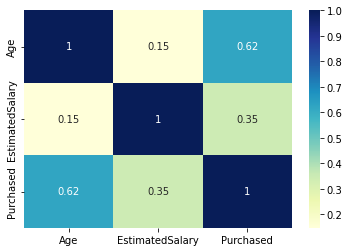

In [8]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [9]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []
Specificity =[]

# 1. Logistic Regression

In [10]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

print("Logistic Regression")
accLogReg = accuracy_score(y_test, y_pred) * 100
recLogReg = recall_score(y_test, y_pred) * 100
preLogReg = precision_score(y_test, y_pred) * 100
f1sLogReg = f1_score(y_test, y_pred) * 100
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
spc = (tn / (tn+fp))*100
print('Accuracy:', accLogReg)
print('Recall:', recLogReg)
print('Precision:', preLogReg)
print('F score:', f1sLogReg)
print('Specificity:', spc)

algos.append("Logistic Regression")
accuracy.append(accLogReg)
recall.append(recLogReg)
precision.append(preLogReg)
f1Score.append(f1sLogReg)
Specificity.append(spc)

Logistic Regression
Accuracy: 83.75
Recall: 70.37037037037037
Precision: 79.16666666666666
F score: 74.50980392156865
Specificity: 90.56603773584906


# 2. SVM

In [11]:
algo = "Support Vector Machine"
model = SVC(kernel='rbf')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy:', acc)
rec = recall_score(y_test, y_pred) * 100
print('Recall:', rec)
pre = precision_score(y_test, y_pred) * 100
print('Precision:', pre)
f1s = f1_score(y_test, y_pred) * 100
print('F score:', f1s)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
spc = (tn / (tn+fp))*100
print('Specificity:', spc)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)
Specificity.append(spc)

Support Vector Machine
Accuracy: 92.5
Recall: 92.5925925925926
Precision: 86.20689655172413
F score: 89.28571428571429
Specificity: 92.45283018867924


# 3. KNN

In [12]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

print("K Nearest Neighbour")
accKNN = accuracy_score(y_test, y_pred) * 100
recKNN = recall_score(y_test, y_pred) * 100
preKNN = precision_score(y_test, y_pred) * 100
f1sKNN = f1_score(y_test, y_pred) * 100
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
spc = (tn / (tn+fp))*100
print('Accuracy:', accKNN)
print('Recall:', recKNN)
print('Precision:', preKNN)
print('F score:', f1sKNN)
print('Specificity:', spc)

algos.append("K Nearest Neighbour")
accuracy.append(accKNN)
recall.append(recKNN)
precision.append(preKNN)
f1Score.append(f1sKNN)
Specificity.append(spc)

K Nearest Neighbour
Accuracy: 91.25
Recall: 88.88888888888889
Precision: 85.71428571428571
F score: 87.27272727272727
Specificity: 92.45283018867924


# 4. Discision Tree

In [13]:
DecTreeReg = DecisionTreeClassifier()
DecTreeReg.fit(x_train, y_train)
y_pred = DecTreeReg.predict(x_test)
print("Decision Tree")
accDecTreeReg = accuracy_score(y_test, y_pred) * 100
recDecTreeReg = recall_score(y_test, y_pred) * 100
preDecTreeReg = precision_score(y_test, y_pred) * 100
f1sDecTreeReg = f1_score(y_test, y_pred) * 100
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
spc = (tn / (tn+fp))*100
print('Accuracy:', accDecTreeReg)
print('Recall:', recDecTreeReg)
print('Precision:', preDecTreeReg)
print('F score:', f1sDecTreeReg)
print('Specificity:', spc)

algos.append("Decision Tree")
accuracy.append(accDecTreeReg)
recall.append(recDecTreeReg)
precision.append(preDecTreeReg)
f1Score.append(f1sDecTreeReg)
Specificity.append(spc)

Decision Tree
Accuracy: 86.25
Recall: 85.18518518518519
Precision: 76.66666666666667
F score: 80.7017543859649
Specificity: 86.79245283018868


# 5. Naive Bayes

In [14]:
NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
print("Naive Bayes")
accNB = accuracy_score(y_test, y_pred) * 100
recNB = recall_score(y_test, y_pred) * 100
preNB = precision_score(y_test, y_pred) * 100
f1sNB = f1_score(y_test, y_pred) * 100
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
spc = (tn / (tn+fp))*100
print('Accuracy:', accNB)
print('Recall:', recNB)
print('Precision:', preNB)
print('F score:', f1sNB)
print('Specificity:', spc)

algos.append("Naive Bayes")
accuracy.append(accNB)
recall.append(recNB)
precision.append(preNB)
f1Score.append(f1sNB)
Specificity.append(spc)

Naive Bayes
Accuracy: 86.25
Recall: 74.07407407407408
Precision: 83.33333333333334
F score: 78.43137254901961
Specificity: 92.45283018867924


# Q1) From dataset ‘social ad’:
## Calculate performance metric
1.	Accuracy
2.	Sensitivity/Recall
3.	Specificity
4.	F-score
5.	Precision


In [15]:
algoTable = pd.DataFrame(list(zip(algos, accuracy, recall, precision, f1Score, Specificity)), columns=["Algorithms", "Accuracy", "Recall", "Precision", "F1 Score", 'Specificity'])
algoTable

,Algorithms,Accuracy,Recall,Precision,F1 Score,Specificity
0,Logistic Regression,83.75,70.370370,79.166667,74.509804,90.566038
1,Support Vector Machine,92.50,92.592593,86.206897,89.285714,92.452830
2,K Nearest Neighbour,91.25,88.888889,85.714286,87.272727,92.452830
3,Decision Tree,86.25,85.185185,76.666667,80.701754,86.792453
4,Naive Bayes,86.25,74.074074,83.333333,78.431373,92.452830


# Q3) Plot a bar graph and compare the accuracy obtained in each case.

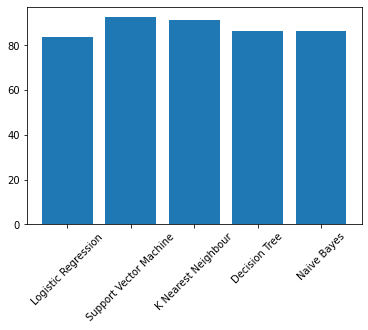

In [16]:
plt.bar(algos, accuracy)
plt.xticks(rotation = 45) 
plt.show()